In [1]:
import pandas as pd

In [ ]:
rep1_files = [
    r'.\Python_replicat_1_1.xlsx', r'.\Python_replicat_1_2.xlsx',
    r'.\Python_replicat_1_3.xlsx', r'.\Python_replicat_1_4.xlsx',
    r'.\Python_replicat_1_5.xlsx'
]

rep2_files = [
    r'.\Python_replicat_2_1.xlsx', r'.\Python_replicat_2_2.xlsx',
    r'.\Python_replicat_2_3.xlsx'
]

def merge_replicate(files):
    dfs = []
    for file in files:
        df = pd.read_excel(file, index_col=0) 
        dfs.append(df)
    merged = pd.concat(dfs, axis=0).groupby(level=0).mean(numeric_only=True)
    return merged

replicat1_df = merge_replicate(rep1_files)
replicat2_df = merge_replicate(rep2_files)

rename_map = {
    "LEC (basal)": "Untreated",
    "DAPT": "DAPT (1 µM)",
    "LA (low)": "LA (11.8 μM)",
    "PP2 (CF)": "PP2 (10 µM)",
    "PP2 (IC50)": "PP2 (5 nM)",
    "SMT (IC50)": "SMT (14.1 nM)"
}

replicat1_df = replicat1_df.rename(index=rename_map)
replicat2_df = replicat2_df.rename(index=rename_map)

replicat1_df

FileNotFoundError: [Errno 2] No such file or directory: '.\\PCR_data\\Python_replicat_1_1.xlsx'

In [ ]:
replicat2_df

,RAPPORT,HEY1,HEY2,HES1,NOTCH1,MYC,HSP,NCOR2,RELN,DAB2
BB94 (1 µM),1.0,0.484156,1.826671,0.552048,0.593152,0.981740,0.791767,1.023084,0.835648,1.046664
DAPT (1 µM),1.0,0.412181,1.650036,0.579701,0.620557,1.055936,0.832219,0.895730,0.591013,0.827045
DAPT+PP2,1.0,0.711439,1.809480,0.640085,1.019619,1.160446,1.152717,1.258761,1.273390,1.049245
LA (11.8 μM),1.0,1.011792,1.325277,0.959761,1.152433,1.052301,0.965937,1.297103,1.069377,0.979461
Untreated,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PP2 (5 nM),1.0,1.216265,1.813785,1.252561,0.898686,1.018331,0.885352,0.787754,0.954039,1.053104
SMT (14.1 nM),1.0,0.820626,1.435095,0.724335,0.842418,1.006900,0.869777,1.002524,1.036062,1.008475


In [ ]:
common_conditions = replicat1_df.index.intersection(replicat2_df.index)
common_genes = replicat1_df.columns.intersection(replicat2_df.columns)

rep1_common = replicat1_df.loc[common_conditions, common_genes]
rep2_common = replicat2_df.loc[common_conditions, common_genes]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

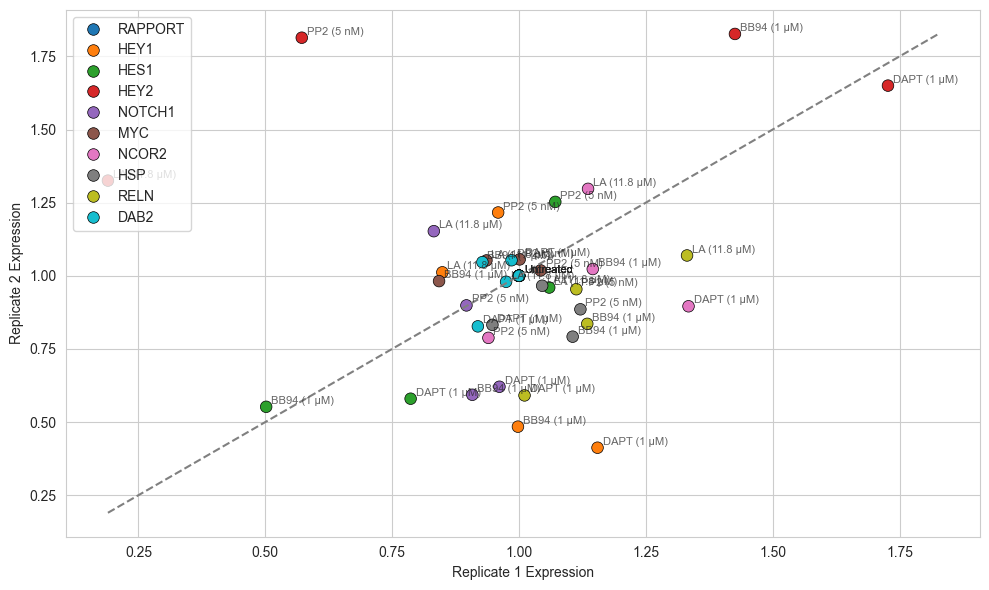

In [ ]:
df_plot = pd.DataFrame({
    'Gene': [],
    'Replicate 1': [],
    'Replicate 2': []
})

for gene in common_genes:
    temp = pd.DataFrame({
        'Gene': gene,
        'Replicate 1': rep1_common[gene],
        'Replicate 2': rep2_common[gene]
    })
    df_plot = pd.concat([df_plot, temp])
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=df_plot, x='Replicate 1', y='Replicate 2',
                hue='Gene', s=70, edgecolor='black', linewidth=0.5)

min_val = min(df_plot['Replicate 1'].min(), df_plot['Replicate 2'].min())
max_val = max(df_plot['Replicate 1'].max(), df_plot['Replicate 2'].max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray')

for i in range(len(df_plot)):
    gene = df_plot['Gene'].iloc[i]
    if gene != "RAPPORT":
        condition = df_plot.index[i]
        x = df_plot['Replicate 1'].iloc[i]
        y = df_plot['Replicate 2'].iloc[i]
        plt.text(x + 0.01, y + 0.01, condition, fontsize=8, alpha=0.7)

plt.xlabel('Replicate 1 Expression')
plt.ylabel('Replicate 2 Expression')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
sns.set_style("whitegrid")

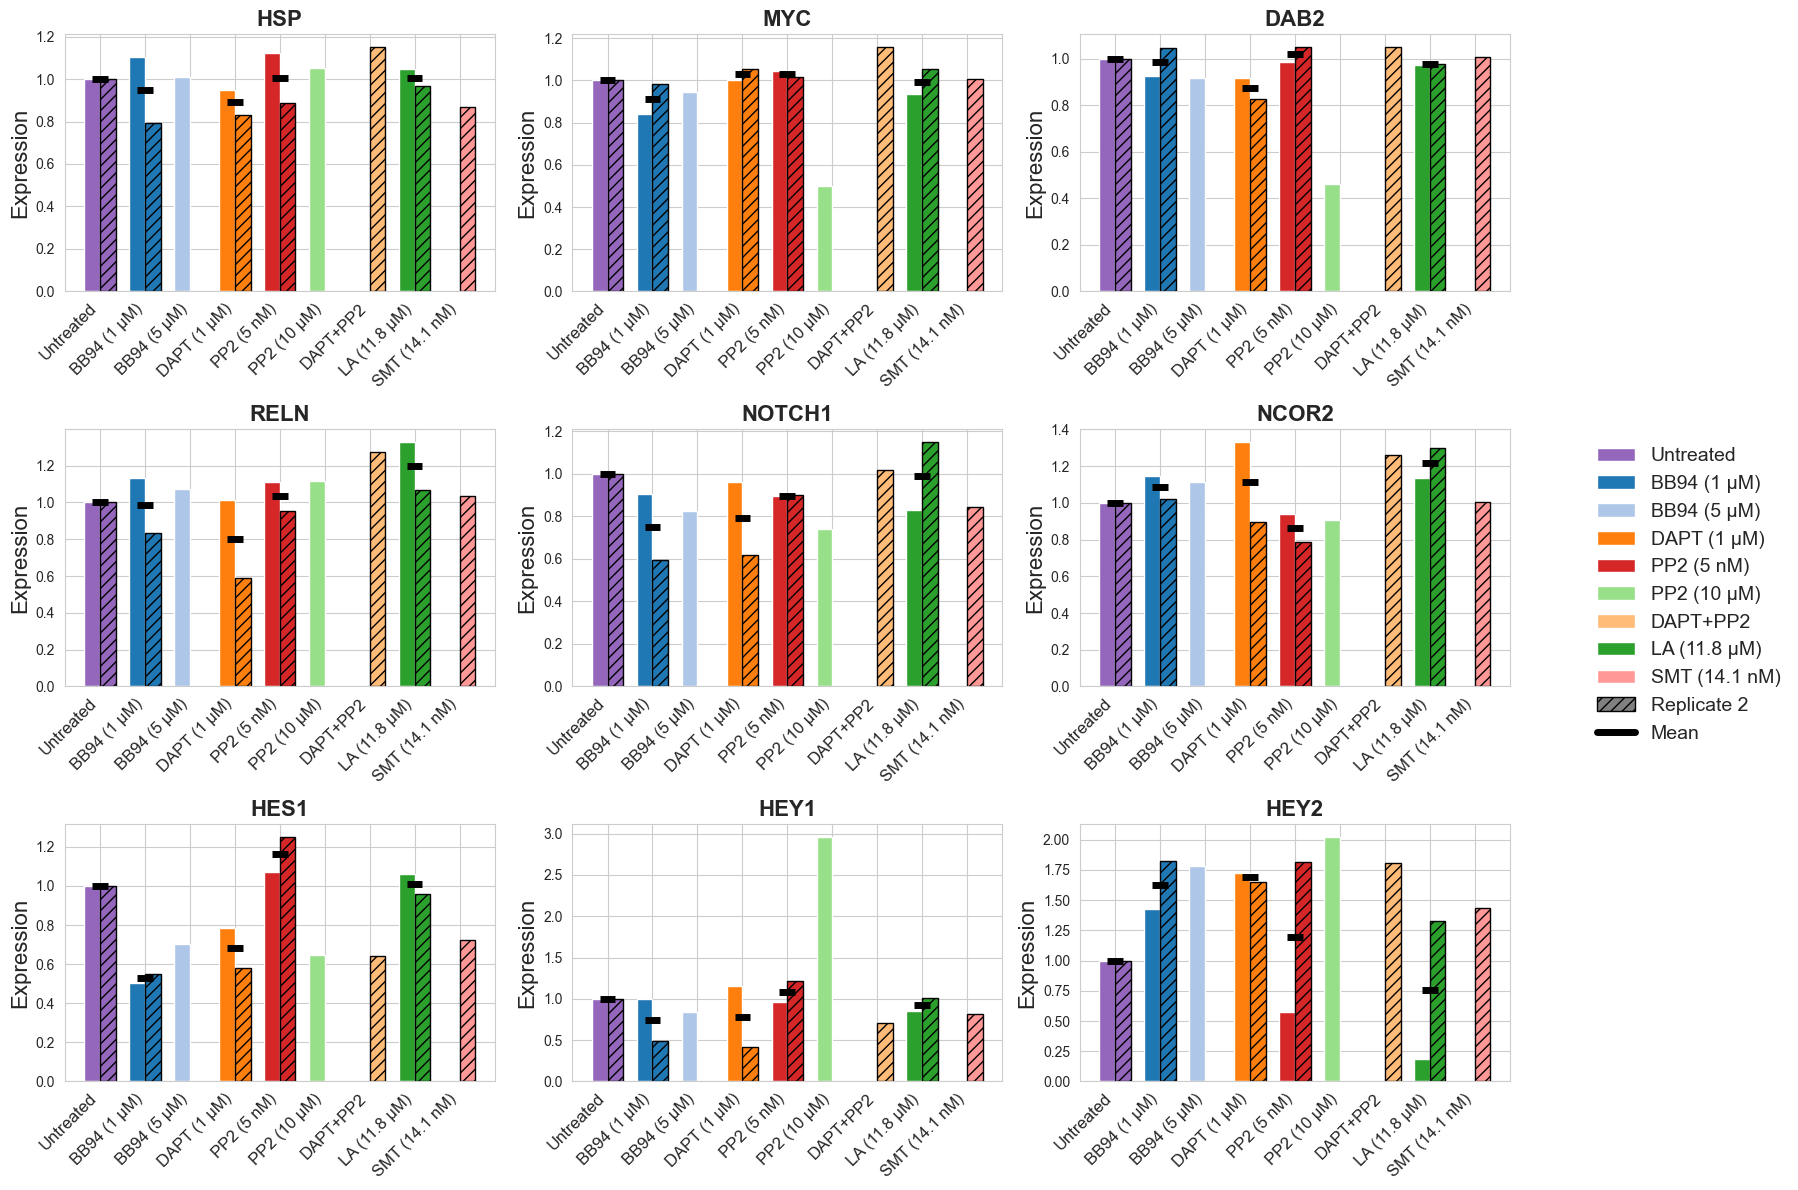

In [ ]:
desired_gene_order = ["HSP", "MYC", "DAB2", "RELN", "NOTCH1", "NCOR2", "HES1", "HEY1", "HEY2"]
genes = [gene for gene in desired_gene_order if gene in replicat1_df.columns or gene in replicat2_df.columns]
genes = [gene for gene in genes if gene != "RAPPORT"]
ncols = 3
n_genes = len(genes)
nrows = int(np.ceil(n_genes / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()

all_conditions = replicat1_df.index.union(replicat2_df.index)
palette = dict(zip(all_conditions, sns.color_palette("tab20", n_colors=len(all_conditions))))

desired_order = [
    "Untreated",
    "BB94 (1 µM)",
    "BB94 (5 µM)",
    "DAPT (1 µM)",
    "PP2 (5 nM)",
    "PP2 (10 µM)",
    "DAPT+PP2",
    "LA (11.8 μM)",
    "SMT (14.1 nM)"
]

plot_idx = 0
for gene in genes:
    rep1_gene = replicat1_df[gene].dropna() if gene in replicat1_df.columns else pd.Series(dtype=float)
    rep2_gene = replicat2_df[gene].dropna() if gene in replicat2_df.columns else pd.Series(dtype=float)
    if rep1_gene.empty and rep2_gene.empty:
        continue
    ax = axes[plot_idx]
    plot_idx += 1
    gene_conditions = rep1_gene.index.union(rep2_gene.index)
    ordered_conditions = [c for c in desired_order if c in gene_conditions]
    width = 0.35
    x = np.arange(len(ordered_conditions))
    
    for j, cond in enumerate(ordered_conditions):
        val1 = rep1_gene.get(cond, np.nan)
        val2 = rep2_gene.get(cond, np.nan)

        if not np.isnan(val1):
            ax.bar(x[j] - width/2, val1, width=width, color=palette[cond], label=cond if plot_idx == 1 else "")
        
        if not np.isnan(val2):
            ax.bar(x[j] + width/2, val2, width=width, color=palette[cond], hatch='///', edgecolor='black')
        
        if not np.isnan(val1) and not np.isnan(val2):
            mean_val = (val1 + val2) / 2
            ax.hlines(mean_val, x[j] - width/2, x[j] + width/2, colors='black', linewidth=5)
    
    ax.set_title(gene, fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(ordered_conditions, rotation=45, ha='right', fontsize=12)
    ax.set_ylabel("Expression", fontsize=16)

for j in range(plot_idx, len(axes)):
    axes[j].axis('off')

legend_elements = [Patch(facecolor=palette[cond], label=cond) for cond in desired_order if cond in palette]
legend_elements.append(Patch(facecolor='gray', hatch='///', edgecolor='black', label='Replicate 2'))
legend_elements.append(Line2D([0], [0], color='black', lw=5, label='Mean'))

plt.tight_layout(rect=[0, 0, 0.85, 1])
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.88, 0.5), frameon=False, fontsize=14)

plt.savefig(r'.\gene_expression_comparison.png', dpi=600, bbox_inches='tight')
plt.show()
